<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/05_linear_SVM_classification_with_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05_linear_SVM_classification_with_scratch

In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [4]:
class LinearSVM:
    def __init__(self, C=1.0):
        self.C = C  # Regularization parameter
        self.alpha = None
        self.support_vectors = None
        self.support_vector_labels = None
        self.support_vector_alphas = None
        self.w = None
        self.b = None

    def linear_kernel(self, x, y):
        return np.dot(x, y)

    def fit(self, X, y):
        m, n = X.shape
        K = np.array([[self.linear_kernel(X[i], X[j]) for j in range(m)] for i in range(m)])

        # Objective function for the dual form
        def objective(alpha):
            return 0.5 * np.sum(alpha * alpha * K * y[:, None] * y[None, :]) - np.sum(alpha)

        # Constraints
        cons = ({'type': 'eq', 'fun': lambda alpha: np.dot(alpha, y)},
                {'type': 'ineq', 'fun': lambda alpha: self.C - alpha},
                {'type': 'ineq', 'fun': lambda alpha: alpha})

        # Initial guess for alpha
        alpha_init = np.zeros(m)

        # Solve QP problem
        result = minimize(objective, alpha_init, constraints=cons)
        self.alpha = result.x

        # Support vectors
        support_vector_indices = self.alpha > 1e-5
        self.support_vectors = X[support_vector_indices]
        self.support_vector_labels = y[support_vector_indices]
        self.support_vector_alphas = self.alpha[support_vector_indices]

        # Calculate weight vector w and intercept b
        self.w = np.sum((self.support_vector_alphas * self.support_vector_labels)[:, None] * self.support_vectors, axis=0)
        self.b = np.mean(self.support_vector_labels - np.dot(self.support_vectors, self.w))

    def decision_function(self, X):
        return np.dot(X, self.w) + self.b

    def predict(self, X):
        return np.sign(self.decision_function(X))

In [5]:
# Generate a linearly separable dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=1, cluster_std=1.0)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

# Train the Linear SVM
svm = LinearSVM(C=1.0)
svm.fit(X, y)

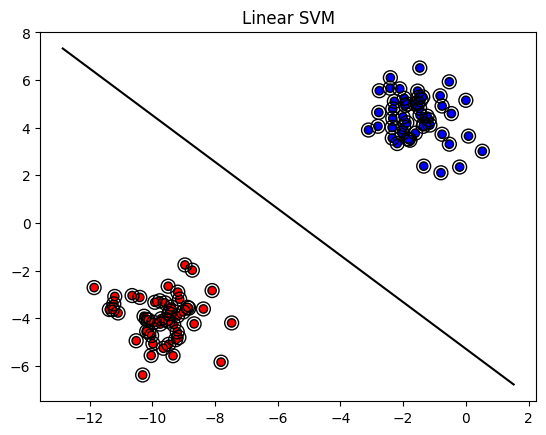

In [6]:
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o', edgecolor='k')
xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
yy = -(svm.w[0] * xx + svm.b) / svm.w[1]
plt.plot(xx, yy, 'k-')

# Highlight support vectors
plt.scatter(svm.support_vectors[:, 0], svm.support_vectors[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title("Linear SVM")
plt.show()
